In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Tải dataset lên
news = pd.read_csv("/content/drive/MyDrive/IS353.O21.HTCL - Mạng xã hội/T1/Fakenewsnet.csv")
news.head()

,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0


In [4]:
###Drop Nan Values
news=news.dropna()

In [5]:
## Nhận các tính năng độc lập

X=news.drop('label',axis=1)

In [6]:
## Nhận các tính năng phụ thuộc
y=news['label']

In [7]:
X.shape

(21407, 4)

In [8]:
y.shape

(21407,)

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.15.0'

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [12]:
### Kích thước từ vựng
voc_size=5000

# **Onehot Representation**

In [13]:
messages=X.copy()

In [14]:
messages['title'][1]

'Paris Jackson & Cara Delevingne Enjoy Night Out In Matching Outfits: They Have ‘Amazing Chemistry’'

In [15]:
messages.reset_index(inplace=True)

In [16]:
import nltk
import re
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
16407
16408
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
1

In [19]:
corpus

['miley cyru liam hemsworth secretli get marri',
 'pari jackson cara delevingn enjoy night match outfit amaz chemistri',
 'celebr join tax march protest donald trump',
 'cindi crawford daughter kaia gerber wear wig dine harri style',
 'full list oscar nomin varieti',
 'realli happen jfk jr met princess diana',
 'biggest celebr scandal',
 'caitlyn jenner address rumor romanc sophia hutchin',
 'taylor swift reportedli react tom hiddleston golden globe win',
 'love god anyon write kate mckinnon good movi role',
 'miley cyru liam hemsworth get marri tybe island despit report',
 'miley cyru claim satan nice guy misunderstood',
 'selena gomez perfect respons news justin bieber engag',
 'critic choic award winner complet list',
 'jennif aniston justin theroux start dog foster adopt busi',
 'angelina joli get heartbreak lose brad pitt real reason furi say sourc',
 'hire ben affleck enlist best friend matt damon life coach',
 'full statement john mccain vote graham cassidi health care bill',
 '

In [20]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[841, 3598, 3357, 4973, 3529, 3883, 1513],
 [1589, 3485, 1180, 3512, 189, 2863, 4191, 2316, 1200, 2435],
 [4811, 3087, 1620, 1745, 2761, 684, 1517],
 [4423, 4138, 4323, 1938, 4834, 4749, 856, 1878, 4649, 2481],
 [584, 2215, 3030, 2877, 462],
 [3937, 3045, 2773, 2067, 582, 1471, 3633],
 [1455, 4811, 4468],
 [22, 3241, 2175, 1862, 3800, 981, 2899],
 [3874, 1017, 4350, 3724, 1383, 695, 743, 1867, 410],
 [3217, 2078, 4415, 3627, 2298, 1374, 3186, 1690, 1638],
 [841, 3598, 3357, 4973, 3883, 1513, 1846, 3331, 4875, 1581],
 [841, 3598, 2042, 4719, 1319, 3110, 3927],
 [3251, 1029, 2428, 4453, 3715, 3552, 2454, 2410],
 [3729, 4894, 2583, 1520, 127, 2215],
 [4480, 1736, 3552, 1033, 2122, 726, 2924, 2541, 3552],
 [311, 362, 3883, 3189, 1277, 2650, 967, 1100, 1815, 3196, 3746, 1977],
 [4730, 1008, 1060, 1257, 2929, 1724, 4706, 4227, 3052, 3831],
 [584, 556, 3420, 1025, 897, 2502, 822, 2695, 4898, 1007],
 [3552, 2454, 3729],
 [4467, 309, 2273, 4029],
 [1542, 1484, 2919, 3195, 3874, 1017, 2596, 321

# **Embedding Representation**

In [21]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3529 3883 1513]
 [   0    0    0 ... 2316 1200 2435]
 [   0    0    0 ... 2761  684 1517]
 ...
 [   0    0    0 ...    0 3064  603]
 [   0    0    0 ... 2122 2903 1480]
 [   0    0    0 ...  745 2204 3778]]


In [22]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  841, 3598, 3357, 4973, 3529, 3883, 1513], dtype=int32)

In [151]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 40)          200000    
                                                                 
 lstm_12 (LSTM)              (None, 100)               56400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [152]:
len(embedded_docs),y.shape

(21407, (21407,))

In [153]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [154]:
X_final.shape,y_final.shape

((21407, 20), (21407,))

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# **Model Training**

In [156]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
225/225 [==============================] - 15s 54ms/step - loss: 0.4758 - accuracy: 0.7881 - val_loss: 0.4010 - val_accuracy: 0.8326
Epoch 2/10
225/225 [==============================] - 11s 51ms/step - loss: 0.3508 - accuracy: 0.8495 - val_loss: 0.3922 - val_accuracy: 0.8345
Epoch 3/10
225/225 [==============================] - 9s 40ms/step - loss: 0.3101 - accuracy: 0.8679 - val_loss: 0.4067 - val_accuracy: 0.8307
Epoch 4/10
225/225 [==============================] - 12s 52ms/step - loss: 0.2809 - accuracy: 0.8835 - val_loss: 0.4361 - val_accuracy: 0.8238
Epoch 5/10
225/225 [==============================] - 12s 54ms/step - loss: 0.2511 - accuracy: 0.8965 - val_loss: 0.4708 - val_accuracy: 0.8215
Epoch 6/10
225/225 [==============================] - 9s 39ms/step - loss: 0.2217 - accuracy: 0.9103 - val_loss: 0.4991 - val_accuracy: 0.8045
Epoch 7/10
225/225 [==============================] - 12s 51ms/step - loss: 0.2013 - accuracy: 0.9190 - val_loss: 0.5492 - val_accuracy: 0

# **Số liệu hiệu suất và độ chính xác**

In [157]:
y_pred=model.predict(X_test)

221/221 [==============================] - 2s 8ms/step


In [158]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [159]:
print(y_pred_binary)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [160]:

from sklearn.metrics import confusion_matrix

In [161]:
# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

[[ 976  738]
 [ 664 4687]]


In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_binary)

0.8015569709837226

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

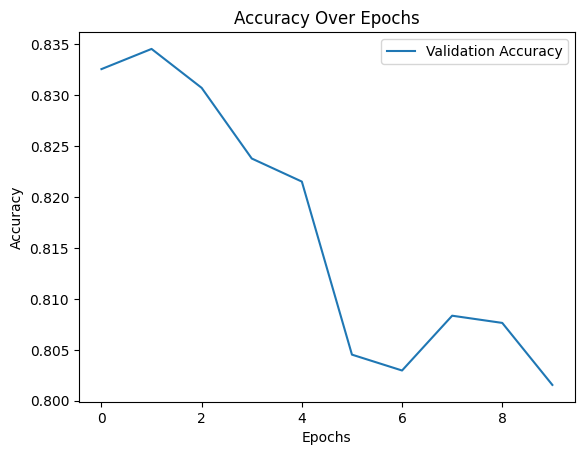

In [166]:
# Vẽ biểu đồ độ chính xác
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

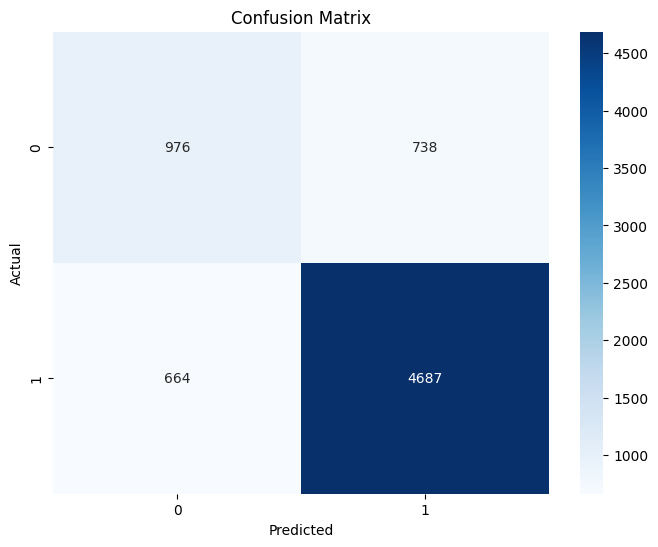

In [165]:
# Vẽ biểu đồ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Ví dụ**

**Tin giả**

In [ ]:
x = ['North Korea fires missiles']
ps = PorterStemmer()
corpus = []
for i in range(0, len(x)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', x[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0


In [ ]:
corpus

['north korea fire missil']

In [ ]:
onehot_repr1=[one_hot(words,voc_size)for words in corpus]
onehot_repr1

[[1075, 1063, 4745, 3772]]

In [ ]:
x_length=20
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=x_length)
print(embedded_docs1)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0 1075 1063 4745 3772]]


In [ ]:
prediction = model.predict(embedded_docs1)


1/1 [==============================] - 0s 40ms/step


In [ ]:
x_pred = (prediction > 0.5).astype(int)
print(x_pred)

[[0]]


**Tin thật** (BBC News)

In [ ]:
y = ['Lib Dems call for more Premier League games on free TV']
ps = PorterStemmer()
corpus = []
for i in range(0, len(y)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', y[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0


In [ ]:
corpus

['lib dem call premier leagu game free tv']

In [ ]:
onehot_repr2=[one_hot(words,voc_size)for words in corpus]
onehot_repr2

[[2997, 2548, 2454, 509, 4649, 2579, 574, 371]]

In [ ]:
y_length=20
embedded_docs2=pad_sequences(onehot_repr2,padding='pre',maxlen=y_length)
print(embedded_docs2)

[[   0    0    0    0    0    0    0    0    0    0    0    0 2997 2548
  2454  509 4649 2579  574  371]]


In [ ]:
prediction1 = model.predict(embedded_docs2)


1/1 [==============================] - 0s 25ms/step


In [ ]:
y_pred = (prediction1 > 0.5).astype(int)
print(y_pred)

[[1]]
